<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Generate-the-Features" data-toc-modified-id="Generate-the-Features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate the Features</a></span></li><li><span><a href="#Generate-Logical-AND-Data" data-toc-modified-id="Generate-Logical-AND-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate Logical AND Data</a></span></li><li><span><a href="#Generate-Logical-OR-Data" data-toc-modified-id="Generate-Logical-OR-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate Logical OR Data</a></span></li><li><span><a href="#Generate-Logical-XOR-Data" data-toc-modified-id="Generate-Logical-XOR-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generate Logical XOR Data</a></span></li><li><span><a href="#The-plot-data-function" data-toc-modified-id="The-plot-data-function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>The plot data function</a></span></li><li><span><a href="#Plot-the-Logical-AND-Data" data-toc-modified-id="Plot-the-Logical-AND-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot the Logical AND Data</a></span></li><li><span><a href="#Plot-the-Logical-OR-Data" data-toc-modified-id="Plot-the-Logical-OR-Data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Plot the Logical OR Data</a></span></li><li><span><a href="#Plot-the-Logical-XOR-Data" data-toc-modified-id="Plot-the-Logical-XOR-Data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Plot the Logical XOR Data</a></span></li><li><span><a href="#The-Multi-layer-Perceptron-classifier" data-toc-modified-id="The-Multi-layer-Perceptron-classifier-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>The Multi-layer Perceptron classifier</a></span></li><li><span><a href="#The-plot-cost-function" data-toc-modified-id="The-plot-cost-function-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>The plot cost function</a></span></li><li><span><a href="#Train-and-Test-the-Perceptron-on-the-Logical-AND-Data" data-toc-modified-id="Train-and-Test-the-Perceptron-on-the-Logical-AND-Data-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Train and Test the Perceptron on the Logical AND Data</a></span></li><li><span><a href="#Train-and-Test-the-MLP-on-the-Logical-OR-Data" data-toc-modified-id="Train-and-Test-the-MLP-on-the-Logical-OR-Data-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Train and Test the MLP on the Logical OR Data</a></span></li><li><span><a href="#Train-and-Test-the-MLP-on-the-Logical-XOR-Data" data-toc-modified-id="Train-and-Test-the-MLP-on-the-Logical-XOR-Data-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Train and Test the MLP on the Logical XOR Data</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Discussion</a></span></li></ul></div>

<b>

<p>
<center>
<font size="5">
Machine Learning I (DATS 6202), Fall 2019
</font>
</center>
</p>

<p>
<center>
<font size="4">
Homework 5
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Yuxiao Huang
</font>
</center>
</p>

</b>

# Overview
- Apply Multi-layer Perceptron to (simulated) non-linearly separable data
- Particularly, you should implement your own model (using backpropagation and stochastic gradient descent)
- Complete the missing parts indicated by # Implement me
- Particularly, the code should
    - be bug-free (while the output produced by your solution being the same as the provided output does not necessarily mean your code is bug-free, it is very likely that there is a bug in your code when the two kinds of output are different)
    - be commented
- **Marks will be deducted if the above requirements (for the code) are not met**
- Submit an ipynb file named homework_5.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_5/

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Generate the Features

In [2]:
import numpy as np
np.random.seed(1)

X_train = np.random.randint(2, size=(1000, 2))
X_test = np.random.randint(2, size=(1000, 2))

# Generate Logical AND Data

In [3]:
y_logical_and_train = np.logical_and(X_train[:, 0], X_train[:, 1])
y_logical_and_test = np.logical_and(X_test[:, 0], X_test[:, 1])

# Generate Logical OR Data

In [4]:
y_logical_or_train = np.logical_or(X_train[:, 0], X_train[:, 1])
y_logical_or_test = np.logical_or(X_test[:, 0], X_test[:, 1])

# Generate Logical XOR Data

In [5]:
y_logical_xor_train = np.logical_xor(X_train[:, 0], X_train[:, 1])
y_logical_xor_test = np.logical_xor(X_test[:, 0], X_test[:, 1])

# The plot data function
Reference: The code below is from exercise_5_solution.ipynb

In [6]:
import matplotlib.pyplot as plt

def plot_data(X, y, title):
    """
    Draw the scatter plot
    
    Parameters
    ----------
    X : the feature matrix
    y : the target vector
    title : the title of the scatter plot
    """

    # The scatter plot
    plt.scatter(X[y == 1, 0],
                X[y == 1, 1],
                s=100,
                c='b',
                marker='x',
                label='1')
    plt.scatter(X[y == 0, 0],
                X[y == 0, 1],
                s=100,
                c='r',
                marker='s',
                label='0')

    # The x-axis
    plt.xlim([-1, 2])
    plt.xticks([-1, 0, 1, 2], fontsize=20)
    plt.xlabel('x1', fontsize=20)

    # The y-axis
    plt.ylim([-1, 2])
    plt.yticks([-1, 0, 1, 2], fontsize=20)
    plt.ylabel('x2', fontsize=20)

    # The title and legend
    plt.title(title, fontsize=20)
    plt.legend(loc='best', fontsize=20)
    
    plt.tight_layout()
    plt.show()

# Plot the Logical AND Data

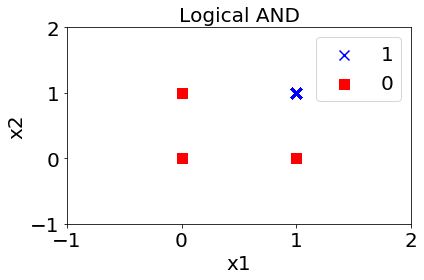

In [7]:
plot_data(X_train, y_logical_and_train, 'Logical AND')

# Plot the Logical OR Data

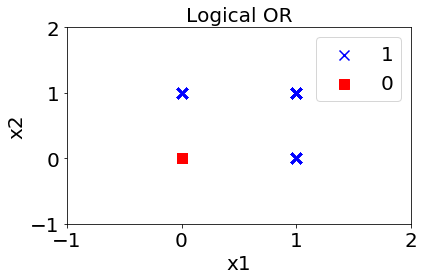

In [8]:
plot_data(X_train, y_logical_or_train, 'Logical OR')

# Plot the Logical XOR Data

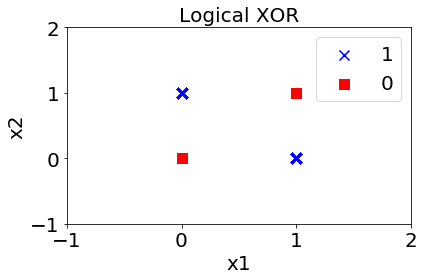

In [9]:
plot_data(X_train, y_logical_xor_train, 'Logical XOR')

# The Multi-layer Perceptron classifier
The key here is implementing:
- backpropagation
- stochastic gradient descent

In [97]:
from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd
from sklearn.utils import shuffle

class MyMLP(BaseEstimator, ClassifierMixin):
    """The multi-layer perceptron classifier"""
        
    def __init__(self, hidden_layer_sizes=[100], activation='logistic', shuffle=True, n_iter=10, eta=1, C=10 ** -6, random_state=0):
        # The number of neurons in each hidden layer
        self.hidden_layer_sizes = hidden_layer_sizes
        
        # The Activation function
        self.activation = activation
        
        # Whether to shuffle samples in each iteration
        self.shuffle = shuffle
        
        # The number of iterations
        self.n_iter = n_iter
        
        # The learning rate
        self.eta = eta
        
        # The regularization parameter
        self.C = C
        
        # The random state
        self.random_state = random_state
                
        # The number of samples
        self.m = None
        
        # The number of features
        self.n = None
        
        # The number of unique class labels
        self.classes = None
        
        # The number of neurons in each layer
        self.layer_sizes = None
        
        # The cost
        self.cost = None
        
        # The random number generator
        self.rgen = None
        
        # The weights
        self.ws = None
        
        # The biases
        self.bs = None
        
        # The net inputs
        self.net_inputs = None
        
        # The activations
        self.activations = None
        
        # The sensitivities
        self.sensitivities = None
        
        # The derivatives
        self.derivatives = None

    def fit(self, X, y):
        """
        The fit function
        
        Parameters
        ----------
        X : the feature matrix
        y : the target vector
        """
        
        # Get the one-hot-encoded target matrix
        y_one_hot_encode = pd.get_dummies(y).values
        
        # Initialize the object variables
        self.fit_init(X, y_one_hot_encode)

        # For each epoc
        for iter in range(self.n_iter):
            # Shuffle the data
            X_shuffle, y_one_hot_encode_shuffle = np.array(X), np.array(y_one_hot_encode)   
            if self.shuffle is True:
                X_shuffle, y_one_hot_encode_shuffle = shuffle(X_shuffle, y_one_hot_encode_shuffle, random_state=self.random_state)
            
            # For each sample
            for i in range(self.m):
                # Update the weights and biases using stochastic gradient descent
                self.stochastic_gradient_descent(X_shuffle[i, :].reshape(1, -1).T, y_one_hot_encode_shuffle[i, :].reshape(1, -1).T)
                
                # Update the cost
                self.cost[iter] += np.sum((y_one_hot_encode_shuffle[i, :].reshape(1, -1).T - self.activations[-1]) ** 2)
                
    def fit_init(self, X, y):
        """
        Initialize the object variables
        
        Parameters
        ----------
        X : the feature matrix
        y : the target vector
        """
        
        # Initialize the number of samples and featurs
        self.m, self.n = X.shape
        
        # Initialize the number of unique class labels
        self.classes = np.unique(y)
        
        # Initialize the number of neurons in each layer
        self.layer_sizes = [self.n] + self.hidden_layer_sizes + [len(self.classes)]
        
        # Initialize the cost
        self.cost = np.zeros(self.n_iter)
        
        # Initialize the random number generator
        self.rgen = np.random.RandomState(seed=self.random_state)
        
        # Initialize the weights
        self.ws = [0] + [self.rgen.normal(loc=0.0, 
                                          scale=2 / np.sqrt(self.layer_sizes[i] + self.layer_sizes[i - 1]), 
                                          size=(self.layer_sizes[i], self.layer_sizes[i - 1]))
                         for i in range(1, len(self.layer_sizes))]
        
        # Initialize the biases
        self.bs = [0] + [np.zeros((self.layer_sizes[i], 1))
                         for i in range(1, len(self.layer_sizes))]
        
        # Initialize the net inputs
        self.net_inputs = [0] * (len(self.layer_sizes))

        # Initialize the activations
        self.activations = [0] * (len(self.layer_sizes))
        
        # Initialize the sensitivities
        self.sensitivities = [0] * (len(self.layer_sizes))
        
        # Initialize the derivatives
        self.derivatives = [0] * (len(self.layer_sizes))
                
    def stochastic_gradient_descent(self, X, y):
        """
        Update the weights and biases using stochastic gradient descent
        
        Parameters
        ----------
        X : the feature matrix
        y : the target vector
        """

        # Get the activation in the first layer
        self.activations[0] = X

        # Propagate the input forward through the network
        for i in range(1, len(self.layer_sizes)):
            # Get the net input in layer i
            self.net_inputs[i] = self.get_net_input(i)  
            
            # Get the activation in layer i
            self.activations[i] = self.get_activation(i)
        
        # Get the sensitivity in the last layer
        self.sensitivities[-1] = - 2 * np.matmul(self.get_derivative(len(self.layer_sizes) - 1), (y - self.activations[-1]))
        
        # Propagate the sensitivites backward through the network
        for i in range(len(self.layer_sizes) - 2, 0, -1):
            # Get the derivative in layer i
            self.derivatives[i] = self.get_derivative(i)
            
            # Get the sensitivity in layer i
            self.sensitivities[i] = self.get_sensitivity(i)
            
        # Update the weights and biases (where regularization must be used for the weights)
        for i in range(1, len(self.layer_sizes)):
            # Implement me
            # Update the weights
            self.ws[i] -= self.eta*(self.sensitivities[i] + self.C*self.ws[i])
            
            # Implement me
            # Update the biases
            self.bs[i] -= self.eta*self.sensitivities[i]

    def get_net_input(self, i):
        """
        Get the net input in layer i
        
        Parameters
        ----------
        i : the layer
        
        Returns
        ----------
        The net input in layer i
        """

        # Implement me
        return np.dot(self.activations[i-1],self.ws[i].T) + self.bs[i].T
  
    
    def get_activation(self, i):
        """
        Get the activation in layer i
        
        Parameters
        ----------
        i : the layer
        
        Returns
        ----------
        The activation in layer i    
        """ 

        if self.activation == 'identity':
            return self.net_inputs[i]
        # Implement me
        elif self.activation == 'logistic':
            return 1 / (1 + (np.exp(np.clip(- self.net_inputs[i], -250, 250))))
        elif self.activation == 'tanh':
            e_z = np.exp(self.net_inputs[i])
            e_neg_z = np.exp(-self.net_inputs[i])
            return (e_z - e_neg_z) / (e_z + e_neg_z)
        elif self.activation == 'relu':
            return np.multiply(self.net_inputs[i], np.sign(self.net_inputs[i]))
        else:
            print("Activation undefined!")
            sys.exit(1)
    
    def get_derivative(self, i):
        """
        Get the derivative in layer i
        
        Parameters
        ----------
        i : the layer
        
        Returns
        ----------
        The derivative in layer i    
        """ 
        
        if self.activation == 'identity':
            return np.identity(self.layer_sizes[i])
        elif self.activation == 'logistic':
            return np.diag(np.multiply(self.activations[i], 1 - self.activations[i]).reshape(-1))
        elif self.activation == 'tanh':
            return np.diag((1 - self.activations[i] ** 2).reshape(-1))
        elif self.activation == 'relu':
            return np.diag(np.sign(self.net_inputs[i]).reshape(-1))
        else:
            print("Activation undefined!")
            sys.exit(1)
        
    def get_sensitivity(self, i):
        """
        Get the sensitivity in layer i
        
        Parameters
        ----------
        i : the layer
        
        Returns
        ----------
        The sensitivity in layer i    
        """  
        
        # Implement me
        return self.get_derivative(i)*self.ws[i+1] * self.sensitivity[i+1]

    def predict(self, X):
        """
        The predict function
        
        Parameters
        ----------
        X : the feature matrix
        
        Returns
        ----------
        The predicted class labels of the target
        """

        # Initialize the net inputs
        self.net_inputs = [0] * (len(self.layer_sizes))
        
        # Initialize the activations
        self.activations = [0] * (len(self.layer_sizes))
        # Initialize the activation in the first layer
        self.activations[0] = X.T

        # Propagate the input forward through the network
        for i in range(1, len(self.layer_sizes)):
            # Get the net input in layer i
            self.net_inputs[i] = self.get_net_input(i)  
            
            # Get the activation in layer i
            self.activations[i] = self.get_activation(i)
                                
        return np.argmax(self.activations[-1], axis=0)

# The plot cost function
Reference: The code below is from exercise_3_solution.ipynb

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_cost(x, y, xlabel, ylabel, title, fontsize):
    """
    Line plot
    
    Parameters
    ----------
    x : the x-axis
    y : the y-axis
    xlabel : the label of the x-axis
    xlabel : the label of the y-axis
    title : the title of the line plot 
    fontsize : the font size
    """
    
    plt.xticks(fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    
    plt.yticks(fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.ylim(0, max(y))
    
    plt.title(title, fontsize=fontsize)
    
    plt.plot(x, y)
    plt.tight_layout()
    plt.show()

In [40]:
X_train.shape
y_logical_and_train.shape

(1000,)

# Train and Test the Perceptron on the Logical AND Data

In [71]:
mymlp = MyMLP(hidden_layer_sizes=[2,1], activation='logistic')
mymlp.fit_init(X_train, y_logical_and_train)

In [93]:
mymlp.activations

[array([[1, 1],
        [0, 0],
        [1, 1],
        ...,
        [0, 0],
        [1, 0],
        [0, 0]]), array([[0.89698916, 0.96156639],
        [0.5       , 0.5       ],
        [0.89698916, 0.96156639],
        ...,
        [0.5       , 0.5       ],
        [0.85371646, 0.72685773],
        [0.5       , 0.5       ]]), array([[0.70040728],
        [0.62574451],
        [0.70040728],
        [0.70040728],
        [0.73512487],
        [0.56737726],
        [0.56737726],
        [0.73512487],
        [0.56737726],
        [0.62574451],
        [0.56737726],
        [0.62574451],
        [0.73512487],
        [0.62574451],
        [0.73512487],
        [0.62574451],
        [0.70040728],
        [0.70040728],
        [0.73512487],
        [0.62574451],
        [0.70040728],
        [0.70040728],
        [0.70040728],
        [0.56737726],
        [0.73512487],
        [0.56737726],
        [0.62574451],
        [0.70040728],
        [0.73512487],
        [0.73512487],
        [0.5

In [73]:
mymlp.activations[0] = X_train

In [99]:
mymlp.ws

[0, array([[1.76405235, 0.40015721],
        [0.97873798, 2.2408932 ]]), array([[ 2.15647022, -1.12846329]]), array([[ 1.09706761],
        [-0.17477225]])]

In [102]:
mymlp.layer_sizes

[2, 2, 1, 2]

In [68]:
np.dot(mymlp.activations[0],mymlp.ws[1].T)

array([[2.16420955, 3.21963118],
       [0.        , 0.        ],
       [2.16420955, 3.21963118],
       ...,
       [0.        , 0.        ],
       [1.76405235, 0.97873798],
       [0.        , 0.        ]])

In [105]:
np.dot(mymlp.activations[i-1],mymlp.ws[i].T)+mymlp.bs[i].T

array([[ 0.76839414, -0.12241176],
       [ 0.68648403, -0.10936278],
       [ 0.76839414, -0.12241176],
       ...,
       [ 0.68648403, -0.10936278],
       [ 0.80648168, -0.12847943],
       [ 0.68648403, -0.10936278]])

In [75]:
for i in range(1, len(mymlp.layer_sizes)):
            # Get the net input in layer i
            mymlp.net_inputs[i] = mymlp.get_net_input(i)  
            
            # Get the activation in layer i
            mymlp.activations[i] = mymlp.get_activation(i)
        
        

In [79]:
mymlp.get_derivative(len(mymlp.layer_sizes) - 1).shape

(2000, 2000)

In [81]:
np.multiply(mymlp.activations[i], 1 - mymlp.activations[i]).shape

(1000, 2)

In [92]:
mymlp.get_derivative(len(mymlp.layer_sizes) - 1).shape

(2000, 2000)

In [106]:
# Get the sensitivity in the last layer
mymlp.sensitivities[-1] = - 2 * np.matmul(mymlp.get_derivative(len(mymlp.layer_sizes) - 1), (y_one_hot_encode - mymlp.activations[-1]))

ValueError: shapes (2000,2000) and (1000,2) not aligned: 2000 (dim 1) != 1000 (dim 0)

In [86]:
y_one_hot_encode = pd.get_dummies(y_logical_and_train).values

In [57]:
mymlp.fit(X_train, y_logical_and_train)

ValueError: shapes (2,1) and (2,2) not aligned: 1 (dim 1) != 2 (dim 0)

In [13]:
print('------------------------')
y_pred = mymlp.predict(X_test)

print('The nubmer of wrong predictions:', abs(y_logical_and_test - y_pred).sum())

------------------------
The nubmer of wrong predictions: 0


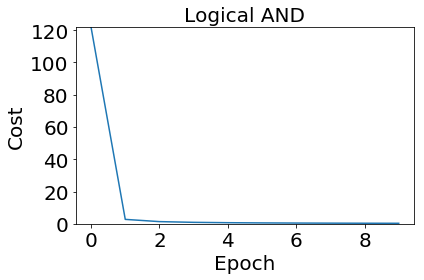

In [14]:
# Get the cost
cost = mymlp.cost

# Get the epoch
epoch = list(range(len(cost)))

# The line plot between epoch and cost
plot_cost(x=epoch, y=cost, xlabel='Epoch', ylabel='Cost', title='Logical AND', fontsize=20)

# Train and Test the MLP on the Logical OR Data

In [15]:
mymlp = MyMLP(hidden_layer_sizes=[2, 1], activation='logistic')
mymlp.fit(X_train, y_logical_or_train)

In [16]:
print('------------------------')
y_pred = mymlp.predict(X_test)

print('The nubmer of wrong predictions:', abs(y_logical_or_test - y_pred).sum())

------------------------
The nubmer of wrong predictions: 0


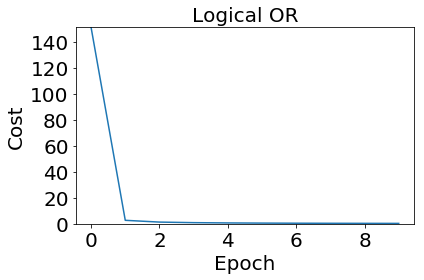

In [17]:
# Get the cost
cost = mymlp.cost

# Get the epoch
epoch = list(range(len(cost)))

# The line plot between epoch and cost
plot_cost(x=epoch, y=cost, xlabel='Epoch', ylabel='Cost', title='Logical OR', fontsize=20)

# Train and Test the MLP on the Logical XOR Data

In [18]:
mymlp = MyMLP(hidden_layer_sizes=[2, 1], activation='logistic')
mymlp.fit(X_train, y_logical_xor_train)

In [19]:
print('------------------------')
y_pred = mymlp.predict(X_test)

print('The nubmer of wrong predictions:', abs(y_logical_xor_test - y_pred).sum())

------------------------
The nubmer of wrong predictions: 0


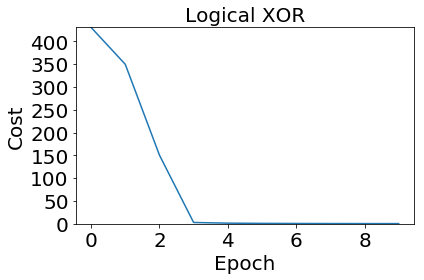

In [20]:
# Get the cost
cost = mymlp.cost

# Get the epoch
epoch = list(range(len(cost)))

# The line plot between epoch and cost
plot_cost(x=epoch, y=cost, xlabel='Epoch', ylabel='Cost', title='Logical XOR', fontsize=20)

# Discussion
The results above show that, unlike single-layer perceptron which only works for linearly separable data (e.g., Logical AND and Logical OR), multi-layer perceptron can be applied to non-linearly separable data (e.g., XOR). While we only used two hidden layers in this assignment, in reality we may need many layers where each layer includes many perceptrons. Such deep neural network allows us to solve complex problems particularly in areas such as Natural Language Processing and Computer Vision.